# Project 2: Ames Housing Data and Kaggle Challenge
---
Book 1: Data Cleaning & Exploratory Data Analysis<br>
**Book 2: Preprocessing & Features Engineering**<br>
Book 3: ML Modelling, Conclusion & Recommendation<br>
Author: Lee Wan Xian

## Contents:
- [Data Import & Preprocessing](#Data-Import-and-Preprocessing)
- [Feature Engineering](#Feature-Engineering)

## Python Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Preprocessing

In [2]:
# Import data file (Train & Test)
dftrainraw = pd.read_csv('../datasets/train.csv')
dfrealtestraw = pd.read_csv('../datasets/test.csv')

In [3]:
# Create a new copy for modelling
dftrain = dftrainraw
dfrealtest = dfrealtestraw

In [4]:
# Update column headers to lowercase & replace spaces with _
dftrain.columns = dftrain.columns.str.lower()
dftrain.columns = dftrain.columns.str.replace(' ', '_')

dfrealtest.columns = dfrealtest.columns.str.lower()
dfrealtest.columns = dfrealtest.columns.str.replace(' ', '_')

### Cleanup train dataset for Features Engineering

We will follow the dataset preparation steps based on the findings stated in EDA.

In [5]:
print(dftrain.shape)
dftrain.info()

(2051, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  hou

In [6]:
# Check for null values
dftrainraw.isnull().sum().sort_values(ascending=False).head(27)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
mo_sold              0
dtype: int64

We will clean up the missing data as per how it was done in Book 1. Only the features that was shortlisted in EDA Summary will need to be cleaned since they are the only ones relevant to the modelling.

In [7]:
# fill up missing values with 'NA'
dftrain['fireplace_qu'].fillna(value = 'NA', inplace=True)
dftrain['bsmt_qual'].fillna(value = 'NA', inplace=True)
dftrain['bsmtfin_type_1'].fillna(value = 'NA', inplace=True)
dftrain['mas_vnr_type'].fillna(value = 'NA', inplace=True)

In [8]:
# fill up missing values with 0
dftrain['mas_vnr_area'].fillna(value = 0, inplace=True)
dftrain['total_bsmt_sf'].fillna(value = 0, inplace=True)

In [9]:
# Remove the 1 missing observation row, as stated in EDA
dftrain.dropna(subset=['garage_area'], inplace=True)

### Cleanup test dataset for Features Engineering

In [10]:
print(dfrealtest.shape)
dfrealtest.info()

(878, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_

In [11]:
# Check for duplicated rows
dfrealtest.duplicated().value_counts()

False    878
dtype: int64

There are no duplicated observations in test dataset.

In [12]:
# Check for null values
dfrealtest.isnull().sum().sort_values(ascending=False).head(20)

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_1     25
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_2     25
electrical          1
mas_vnr_type        1
mas_vnr_area        1
kitchen_abvgr       0
dtype: int64

We will clean up the missing data as per how it was done in Book 1. This is assuming that the reasons behind the 'missing' data are the same as those in train dataset.

In [13]:
# fill up missing values with 'NA'
dfrealtest['fireplace_qu'].fillna(value = 'NA', inplace=True)
dfrealtest['bsmt_qual'].fillna(value = 'NA', inplace=True)
dfrealtest['bsmtfin_type_1'].fillna(value = 'NA', inplace=True)
dfrealtest['mas_vnr_type'].fillna(value = 'NA', inplace=True)

In [14]:
# fill up missing values with 0
dfrealtest['mas_vnr_area'].fillna(value = 0, inplace=True)

### Prepare train & test dataset for modelling

In [15]:
# Drop the unwanted variables for both datasets
dftrain.drop(columns = ['id','pid','lot_frontage','lot_area','street','alley','lot_shape','land_contour','utilities','lot_config',
                        'land_slope','condition_1','condition_2','bldg_type','year_built','roof_style',
                        'roof_matl','exterior_1st','exterior_2nd','exter_cond','bsmt_cond','bsmt_exposure','bsmtfin_sf_1',
                        'bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf','heating','central_air','electrical','1st_flr_sf','2nd_flr_sf','low_qual_fin_sf',
                        'bsmt_full_bath','bsmt_half_bath','full_bath','half_bath','bedroom_abvgr','kitchen_abvgr','functional',
                        'fireplaces','garage_type','garage_yr_blt','garage_finish','garage_cars','garage_qual','garage_cond',
                        'paved_drive','wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch','pool_area',
                        'pool_qc','fence','misc_feature','misc_val','mo_sold','yr_sold','sale_type'],
             inplace=True)

dfrealtest.drop(columns = ['id','pid','lot_frontage','lot_area','street','alley','lot_shape','land_contour','utilities','lot_config',
                           'land_slope','condition_1','condition_2','bldg_type','year_built','roof_style',
                           'roof_matl','exterior_1st','exterior_2nd','exter_cond','bsmt_cond','bsmt_exposure','bsmtfin_sf_1',
                           'bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf','heating','central_air','electrical','1st_flr_sf','2nd_flr_sf','low_qual_fin_sf',
                           'bsmt_full_bath','bsmt_half_bath','full_bath','half_bath','bedroom_abvgr','kitchen_abvgr','functional',
                           'fireplaces','garage_type','garage_yr_blt','garage_finish','garage_cars','garage_qual','garage_cond',
                           'paved_drive','wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch','pool_area',
                           'pool_qc','fence','misc_feature','misc_val','mo_sold','yr_sold','sale_type'],
                inplace=True)

In [16]:
# Map the dataframes over to a new pair of dataframes
dftrain_clean = dftrain
dfrealtest_clean = dfrealtest

In [17]:
# Show whether are there any more observations that have missing value (train dataset)
dftrain_clean.isnull().sum()

ms_subclass       0
ms_zoning         0
neighborhood      0
house_style       0
overall_qual      0
overall_cond      0
year_remod/add    0
mas_vnr_type      0
mas_vnr_area      0
exter_qual        0
foundation        0
bsmt_qual         0
bsmtfin_type_1    0
total_bsmt_sf     0
heating_qc        0
gr_liv_area       0
kitchen_qual      0
totrms_abvgrd     0
fireplace_qu      0
garage_area       0
saleprice         0
dtype: int64

In [18]:
# Show whether are there any more observations that have missing value (test dataset)
dfrealtest_clean.isnull().sum()

ms_subclass       0
ms_zoning         0
neighborhood      0
house_style       0
overall_qual      0
overall_cond      0
year_remod/add    0
mas_vnr_type      0
mas_vnr_area      0
exter_qual        0
foundation        0
bsmt_qual         0
bsmtfin_type_1    0
total_bsmt_sf     0
heating_qc        0
gr_liv_area       0
kitchen_qual      0
totrms_abvgrd     0
fireplace_qu      0
garage_area       0
dtype: int64

## Feature Engineering

### Age of Property: age

This feature is created to focus on the age of the property in relation to its sale price. The variable `year_remod/add` was used as it seems that the market views a renovated property as a brand new property and expect to pay a higher price for them. The year 2022 was used as it is the current year that this model was created. There is a linear relationship between `age` and `saleprice`.

In [19]:
# Create a new data series for the age of the property

dftrain_clean['age'] = 2022 - dftrain_clean['year_remod/add']
dfrealtest_clean['age'] = 2022 - dfrealtest_clean['year_remod/add']

In [20]:
# Remove year_remod/add columns since age feature serves the same purpose

dftrain_clean.drop(columns = ['year_remod/add'], inplace=True)
dftrain_clean = dftrain_clean

dfrealtest_clean.drop(columns = ['year_remod/add'], inplace=True)
dfrealtest_clean = dfrealtest_clean

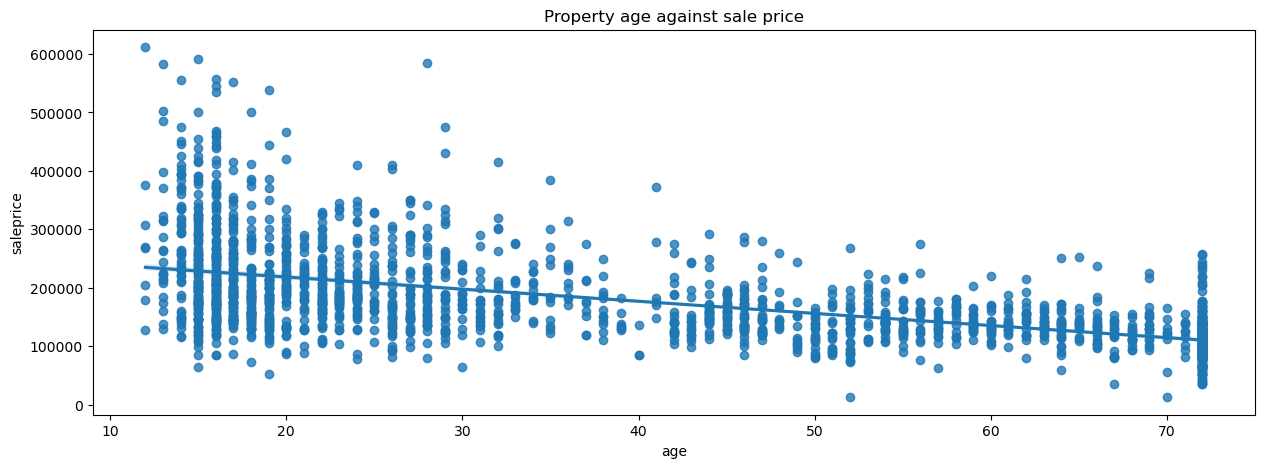

In [21]:
# Scatter plot showing the linear relationship between age & saleprice

plt.figure(figsize=(15,5))
sns.regplot(data=dftrain_clean, x='age', y='saleprice', ci=95);
plt.title(f'Property age against sale price', fontsize = 12);

### Property Area: property_area

Since `gr_liv_area`, `garage_area` & `total_bsmt_sf` are factors that contribute to the size of the property, we can create a new feature (Property Area). Thus, reducing noise & amplify signal into the model. There should be a linear relationship between `property_area` & `saleprice`.

In [22]:
# Create a new data series for the property area

dftrain_clean['property_area'] = dftrain_clean['gr_liv_area'] + dftrain_clean['garage_area'] + dftrain_clean['total_bsmt_sf']
dfrealtest_clean['property_area'] = dfrealtest_clean['gr_liv_area'] + dfrealtest_clean['garage_area'] + dfrealtest_clean['total_bsmt_sf']

In [23]:
# Remove the relevant columns since property_age feature serves the same purpose

dftrain_clean.drop(columns = ['gr_liv_area','garage_area','total_bsmt_sf'],
                   inplace=True)
dftrain_clean = dftrain_clean

dfrealtest_clean.drop(columns = ['gr_liv_area','garage_area','total_bsmt_sf'],
                   inplace=True)
dfrealtest_clean = dfrealtest_clean

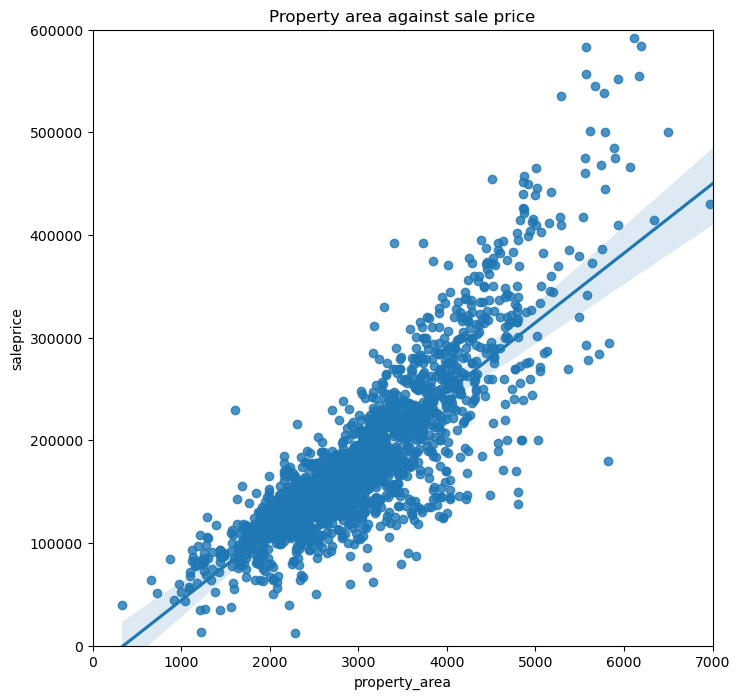

In [24]:
# Scatter plot showing the linear relationship between property area & saleprice

plt.figure(figsize=(8,8))
sns.regplot(data=dftrain_clean, x='property_area', y='saleprice', ci=95).set(xlim=(0, 7000),ylim=(0, 600000));
plt.title(f'Property area against sale price', fontsize = 12);

### Overall Property Score: overall_score

Since `overall_qual` & `overall_cond` are indicators of the overall quality & condition of the property, we can create a new feature (Overall Property Score). There should be a linear relationship between `overall_score` & `saleprice`.

In [25]:
# Create a new data series for the overall property score

dftrain_clean['overall_score'] = dftrain_clean['overall_qual'] + dftrain_clean['overall_cond']
dfrealtest_clean['overall_score'] = dfrealtest_clean['overall_qual'] + dfrealtest_clean['overall_cond']

In [26]:
# Remove the relevant columns since overall_score feature serves the same purpose

dftrain_clean.drop(columns = ['overall_qual','overall_cond'],
                   inplace=True)
dftrain_clean = dftrain_clean

dfrealtest_clean.drop(columns = ['overall_qual','overall_cond'],
                   inplace=True)
dfrealtest_clean = dfrealtest_clean

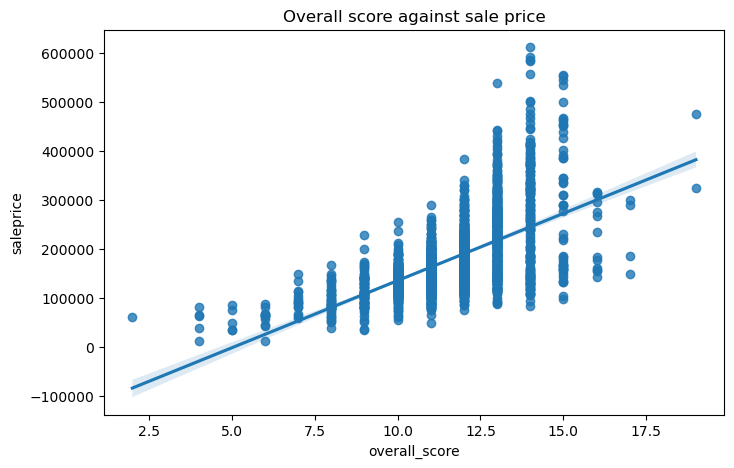

In [27]:
# Scatter plot showing the linear relationship between overall score & saleprice

plt.figure(figsize=(8,5))
sns.regplot(data=dftrain_clean, x='overall_score', y='saleprice', ci=95);
plt.title(f'Overall score against sale price', fontsize = 12);

### Categorical Data Features Encoding

We will leverage on One-Hot Encoding and Integer Encoding to convert the categorical and ordinal data into numerical data for the model to interpret.

**One-Hot Encoding**

In [28]:
# Use OHE to covert variables into a numerical format

dftrain_clean = pd.get_dummies(dftrain_clean, columns=['ms_zoning','neighborhood','house_style','foundation','ms_subclass','mas_vnr_type'])
dfrealtest_clean = pd.get_dummies(dfrealtest_clean, columns=['ms_zoning','neighborhood','house_style','foundation','ms_subclass','mas_vnr_type'])

In [29]:
# show the shape of train & test dataframes after performing OHE
print(f'The row, column count of train dataframe is {dftrain_clean.shape}')
print(f'The row, column count of train dataframe is {dfrealtest_clean.shape}')

The row, column count of train dataframe is (2050, 82)
The row, column count of train dataframe is (878, 78)


There seem to be some categorical observations unique to train dataframe only. That resulted in the test dataframe to generate a different number of columns from that of train dataframe. We will need to insert the different dummy columns into the test dataframe for consistency.

In [30]:
# Identity any columns that are missing between train & test dataframes

missing_cols_testdf = set(dftrain_clean.columns) - set(dfrealtest_clean.columns)
print(f'Features missing in dfrealtest are {missing_cols_testdf}')

missing_cols_traindf = set(dfrealtest_clean.columns) - set(dftrain_clean.columns)
print(f'Features missing in dftrain are {missing_cols_traindf}')

Features missing in dfrealtest are {'neighborhood_Landmrk', 'ms_zoning_A (agr)', 'ms_subclass_150', 'neighborhood_GrnHill', 'saleprice'}
Features missing in dftrain are {'mas_vnr_type_CBlock'}


In [31]:
# Impute the 'missing' columns exclude saleprice in test dataframe as '0'

for col in missing_cols_testdf:
    if col != 'saleprice':
        dfrealtest_clean[col] = 0

In [32]:
# Impute the 'missing' columns exclude saleprice in train dataframe as '0'

for col in missing_cols_traindf:
    if col != 'saleprice':
        dftrain_clean[col] = 0

In [33]:
# Double check whether any columns are left out between train & test dataframes

missing_cols_testdf = set(dftrain_clean.columns) - set(dfrealtest_clean.columns)
print(f'Features missing in dfrealtest are {missing_cols_testdf}')

missing_cols_traindf = set(dfrealtest_clean.columns) - set(dftrain_clean.columns)
print(f'Features missing in dftrain are {missing_cols_traindf}')

Features missing in dfrealtest are {'saleprice'}
Features missing in dftrain are set()


This means that now both dataframes have the same set of feature columns except target variable `saleprice`.

**Integer encoding**

In [34]:
# Use integer encoding to convert variables into a numerical format

dftrain_clean['exter_qual'] = dftrain_clean.exter_qual.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
dfrealtest_clean['exter_qual'] = dfrealtest_clean.exter_qual.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

In [35]:
# Use integer encoding to convert variables into a numerical format

dftrain_clean['bsmt_qual'] = dftrain_clean.bsmt_qual.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
dfrealtest_clean['bsmt_qual'] = dfrealtest_clean.bsmt_qual.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})

In [36]:
# Use integer encoding to convert variables into a numerical format

dftrain_clean['heating_qc'] = dftrain_clean.heating_qc.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
dfrealtest_clean['heating_qc'] = dfrealtest_clean.heating_qc.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

In [37]:
# Use integer encoding to convert variables into a numerical format

dftrain_clean['fireplace_qu'] = dftrain_clean.fireplace_qu.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})
dfrealtest_clean['fireplace_qu'] = dfrealtest_clean.fireplace_qu.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0})

In [38]:
# Use integer encoding to convert variables into a numerical format

dftrain_clean['bsmtfin_type_1'] = dftrain_clean.bsmtfin_type_1.map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})
dfrealtest_clean['bsmtfin_type_1'] = dfrealtest_clean.bsmtfin_type_1.map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0})

In [39]:
# Use integer encoding to convert variables into a numerical format

dftrain_clean['kitchen_qual'] = dftrain_clean.kitchen_qual.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
dfrealtest_clean['kitchen_qual'] = dfrealtest_clean.kitchen_qual.map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

### Export cleaned dataframes as csv files

In [40]:
# Export the dataframes into csv files
import os

# create new folder named 'output' if it does not exist
if not os.path.exists('../output'):
    os.makedirs('../output')
    
dftrain_clean.to_csv('../output/train_clean.csv', index=False)
dfrealtest_clean.to_csv('../output/realtest_clean.csv', index=False)

In [41]:
# show train dataframe for modelling
print(dftrain_clean.shape)
dftrain_clean.info()
dftrain_clean.head()

(2050, 83)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 83 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mas_vnr_area          2050 non-null   float64
 1   exter_qual            2050 non-null   int64  
 2   bsmt_qual             2050 non-null   int64  
 3   bsmtfin_type_1        2050 non-null   int64  
 4   heating_qc            2050 non-null   int64  
 5   kitchen_qual          2050 non-null   int64  
 6   totrms_abvgrd         2050 non-null   int64  
 7   fireplace_qu          2050 non-null   int64  
 8   saleprice             2050 non-null   int64  
 9   age                   2050 non-null   int64  
 10  property_area         2050 non-null   float64
 11  overall_score         2050 non-null   int64  
 12  ms_zoning_A (agr)     2050 non-null   uint8  
 13  ms_zoning_C (all)     2050 non-null   uint8  
 14  ms_zoning_FV          2050 non-null   uint8  
 15  ms_zoning_

,mas_vnr_area,exter_qual,bsmt_qual,bsmtfin_type_1,heating_qc,kitchen_qual,totrms_abvgrd,fireplace_qu,saleprice,age,...,ms_subclass_150,ms_subclass_160,ms_subclass_180,ms_subclass_190,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_NA,mas_vnr_type_None,mas_vnr_type_Stone,mas_vnr_type_CBlock
0,289.0,4,3,6,5,4,6,0,130500,17,...,0,0,0,0,0,1,0,0,0,0
1,132.0,4,4,6,5,4,8,3,220000,25,...,0,0,0,0,0,1,0,0,0,0
2,0.0,3,3,6,3,4,5,0,109000,15,...,0,0,0,0,0,0,0,1,0,0
3,0.0,3,4,1,4,3,7,0,174000,15,...,0,0,0,0,0,0,0,1,0,0
4,0.0,3,2,1,3,3,6,0,138500,29,...,0,0,0,0,0,0,0,1,0,0


In [42]:
# show test dataframe for modelling
print(dfrealtest_clean.shape)
dfrealtest_clean.info()
dfrealtest_clean.head()

(878, 82)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mas_vnr_area          878 non-null    float64
 1   exter_qual            878 non-null    int64  
 2   bsmt_qual             878 non-null    int64  
 3   bsmtfin_type_1        878 non-null    int64  
 4   heating_qc            878 non-null    int64  
 5   kitchen_qual          878 non-null    int64  
 6   totrms_abvgrd         878 non-null    int64  
 7   fireplace_qu          878 non-null    int64  
 8   age                   878 non-null    int64  
 9   property_area         878 non-null    int64  
 10  overall_score         878 non-null    int64  
 11  ms_zoning_C (all)     878 non-null    uint8  
 12  ms_zoning_FV          878 non-null    uint8  
 13  ms_zoning_I (all)     878 non-null    uint8  
 14  ms_zoning_RH          878 non-null    uint8  
 15  ms_zoning_RL 

,mas_vnr_area,exter_qual,bsmt_qual,bsmtfin_type_1,heating_qc,kitchen_qual,totrms_abvgrd,fireplace_qu,age,property_area,...,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_NA,mas_vnr_type_None,mas_vnr_type_Stone,neighborhood_Landmrk,ms_zoning_A (agr),ms_subclass_150,neighborhood_GrnHill
0,0.0,3,2,1,4,2,9,0,72,3388,...,0,0,0,0,1,0,0,0,0,0
1,0.0,3,4,1,3,3,10,0,45,4514,...,0,0,0,0,1,0,0,0,0,0
2,0.0,4,4,6,5,4,7,4,16,2576,...,0,0,0,0,1,0,0,0,0,0
3,0.0,4,3,1,3,3,5,0,16,2416,...,0,0,0,0,1,0,0,0,0,0
4,247.0,3,4,4,4,3,6,4,59,3302,...,0,1,0,0,0,0,0,0,0,0


Hence, the train & test dataframes are now prepared and ready for model testing. These dataframes have been exported & saved as csv files under `output` folder.

**Please refer to Book 3 for ML Modelling, Conclusion & Recommendation**